# Guided Project: Building A Handwritten Digits Classifier

## Introduction 

For this particular project I will accomplish a few tasks in mind: 

   1) Explore why image classification is a hard task.
   
   2) Observe the limitations of traditional machine learning models for image 
      classification.
    
   3) Train, test and improve a few different deep neural networks for image 
      classification.
      
In the lesson from Dataquest, deep neural networks are used to reach state-of-the-art performance on image classification. In some of the image classifcation tasks, deep neural networks can perform the same or better than a human. However, even though deep neural networks can achieve a very accurate image classification, it is actually a very difficult task. There are a few reasons as to why this is difficult: 

   1) Each image in a training set is high dimensional and each pixel in the 
      image is a feature and a separate column. For example, a 128x128 image has 
      16,384 features. 

   2) The images are downsampled to a lower resolution and changed to a 
       grayscale due to the computational power it takes when kept at its 
       regular resolution. Therefore, there is sometimes a loss in the detail 
       when training and matching the patterns. 
       
   3) The features in an image don't have an obvious linear/non-linear 
      relationship that can be learned with models such as linear or 
      logistic regression. 
      
Essentially, deep learning is effective in image classification because of the model's ability to learn hierarchical representations. An effective deep learning model can learn intermediate representations at each layer in the model and can use them when predicting. 

In [1]:
from sklearn.datasets import load_digits
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

digits = load_digits()
print(digits.keys())
labels = pd.Series(digits['target'])
digits = pd.DataFrame(digits['data'])
digits.head()

dict_keys(['images', 'target_names', 'data', 'DESCR', 'target'])


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


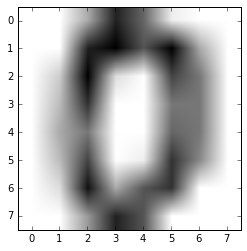

In [2]:
first_image = digits.iloc[0]
np_image = first_image.values
np_image = np_image.reshape(8, 8)
plt.imshow(np_image, cmap = 'gray_r')

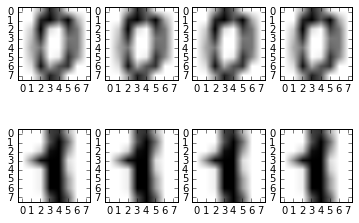

In [3]:
f, axarr = plt.subplots(2,4)
axarr[0,0].imshow(digits.iloc[0].values.reshape(8,8), cmap = 'gray_r')
axarr[0,1].imshow(digits.iloc[0].values.reshape(8,8), cmap = 'gray_r')
axarr[0,2].imshow(digits.iloc[0].values.reshape(8,8), cmap = 'gray_r')
axarr[0,3].imshow(digits.iloc[0].values.reshape(8,8), cmap = 'gray_r')

axarr[1,0].imshow(digits.iloc[1].values.reshape(8,8), cmap = 'gray_r')
axarr[1,1].imshow(digits.iloc[1].values.reshape(8,8), cmap = 'gray_r')
axarr[1,2].imshow(digits.iloc[1].values.reshape(8,8), cmap = 'gray_r')
axarr[1,3].imshow(digits.iloc[1].values.reshape(8,8), cmap = 'gray_r')


## K-Nearest Neighbors Model 

Although linear and logistic regression models make assumptions about the linearity between both the features and output labels, k-nearest neighbors algorithm makes no such assumption. Therefore, k-nearest neighbors doesn't have a specific model representation. 

The k-nearest neighbors algorithm compares all seen observations in the test set to all other training observations in a constrained space. The algorithm then finds the label with the most nearby observations and assigns the prediction for the unseen observations. 

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
import pandas as pd

def train(nneighbors, train_features, train_labels):
    knn = KNeighborsClassifier(n_neighbors = nneighbors)
    knn.fit(train_features, train_labels)
    return knn
    
def test(model, test_features, test_labels):
    prediction = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['actual'] = test_labels
    train_test_df['predicted'] = prediction
    accuracy = sum(train_test_df['predicted'] == train_test_df['actual'])/len(train_test_df)
    return accuracy

def cross_validate(k):
    fold_accuracy = []
    kf = KFold(n_splits = 4, random_state = 2)
    for train_index, test_index in kf.split(digits):
        train_features, test_features = digits.loc[train_index], digits.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train(k, train_features, train_labels)
        accuracy = test(model, test_features, test_labels)
        fold_accuracy.append(accuracy)
    return fold_accuracy

knn_1 = cross_validate(1)
np.mean(knn_1)
    
        
    
                              
    


0.9677233358079684

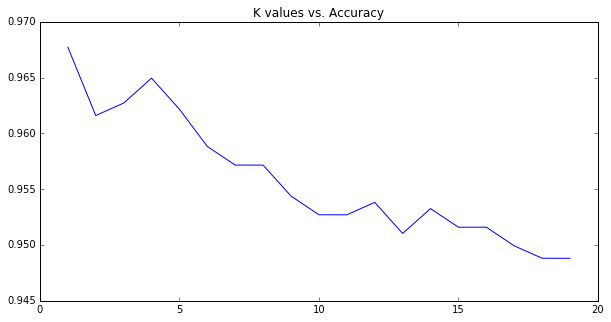

In [5]:
values = list(range(1,20))

accuracy_values = []
for k in values: 
    accuracy = cross_validate(k)
    average = np.mean(accuracy)
    accuracy_values.append(average)

plt.figure(figsize=(10,5))
plt.title('K values vs. Accuracy')
plt.plot(values, accuracy_values)

        

## Neural Network With One Hidden Layer

Even though K-nearest neighbors seems like a good model at first since it doesn't depend on linearity between features and labels, there are potential downsides to it. The two downsides are: 
    
   1) High Memory usage 
   
   2) No model representation 
   
Instead of a K-nearest neighbors algorithm, I will implement a neural network with one hidden layer. 

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



[0.8519475377381837,
 0.9337713437268003,
 0.936003464488988,
 0.9398960653303639,
 0.9465701559020044,
 0.9543677307597129]

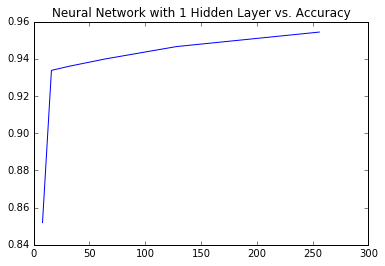

In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold 
import pandas as pd

def train_neural_network(neuron, train_features, train_labels):
    mlp = MLPClassifier(hidden_layer_sizes = neuron)
    mlp.fit(train_features, train_labels)
    return mlp

def test_neural_network(model, test_features, test_labels):
    prediction = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['actual'] = test_labels 
    train_test_df['predicted'] = prediction
    accuracy = sum(train_test_df['actual'] == train_test_df['predicted']) / len(train_test_df)
    return accuracy 

def cross_validation(neuron):
    kf = KFold(n_splits = 4, random_state = 2)
    accuracy_values = []
    for train_index, test_index in kf.split(digits):
        train_features, test_features = digits.loc[train_index], digits.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train_neural_network(neuron, train_features, train_labels)
        accuracy = test_neural_network(model, test_features, test_labels)
        accuracy_values.append(accuracy)
    return accuracy_values

neurons = [(8,), (16,), (32,), (64,), (128,), (256,)]
accuracy_list = []

for n in neurons: 
    accr = cross_validation(n)
    mean_accr = np.mean(accr)
    accuracy_list.append(mean_accr)

x = [i[0] for i in neurons]
plt.title('Neural Network with 1 Hidden Layer vs. Accuracy')
plt.plot(x, accuracy_list)
accuracy_list
    
        

As seen in the graph, adding more neurons to a single hidden layer improved the classification accuracy. I will now try two hidden layers. 

## Neural Network With Two Hidden Layers

[0.9421306607275427, 0.9560331601088838, 0.9549232863152686]

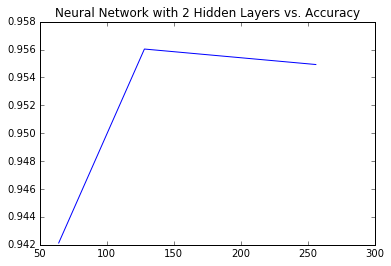

In [7]:
neurons = [(64,64), (128, 128), (256, 256)]
accurate_listings = []
for n in neurons: 
    accuracy = cross_validation(n)
    average = np.mean(accuracy)
    accurate_listings.append(average)
    
x = [i[0] for i in neurons]
plt.title('Neural Network with 2 Hidden Layers vs. Accuracy')
plt.plot(x, accurate_listings)
accurate_listings

When using a neural network, overfitting tends to happen when the number of layers are increased. To counteract this, I will increase the number of folds in K-Fold cross validation to 6 and try a three hidden layer neural network. 

## Neural Network with Three Hidden Layers 

/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.



[0.8848216276477147, 0.9499182460052026, 0.9582590115198811]

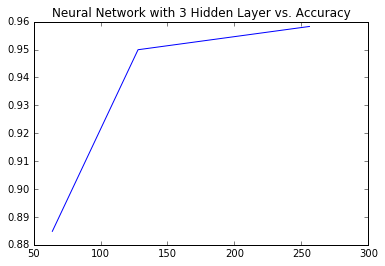

In [8]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold 
import pandas as pd

def train_neural_network_six_hidden_layers(neuron, train_features, train_labels):
    mlp = MLPClassifier(hidden_layer_sizes = neuron)
    mlp.fit(train_features, train_labels)
    return mlp

def test_neural_network_six_hidden_layers(model, test_features, test_labels):
    prediction = model.predict(test_features)
    train_test_df = pd.DataFrame()
    train_test_df['actual'] = test_labels 
    train_test_df['predicted'] = prediction
    accuracy = sum(train_test_df['actual'] == train_test_df['predicted']) / len(train_test_df)
    return accuracy 

def cross_validation_six_hidden_layers(neuron):
    kf = KFold(n_splits = 6, random_state = 2)
    accuracy_values_6 = []
    for train_index, test_index in kf.split(digits):
        train_features, test_features = digits.loc[train_index], digits.loc[test_index]
        train_labels, test_labels = labels.loc[train_index], labels.loc[test_index]
        model = train_neural_network_six_hidden_layers(neuron, train_features, train_labels)
        accuracy = test_neural_network_six_hidden_layers(model, test_features, test_labels)
        accuracy_values_6.append(accuracy)
    return accuracy_values_6

neurons_3 = [(10,10,10), (128,128,128), (256,256,256)]
accuracy_list_6 = []

for n in neurons_3: 
    accr = cross_validation_six_hidden_layers(n)
    mean_accr = np.mean(accr)
    accuracy_list_6.append(mean_accr)

x = [i[0] for i in neurons]
plt.title('Neural Network with 3 Hidden Layer vs. Accuracy')
plt.plot(x, accuracy_list_6)
accuracy_list_6
    